# Assignment 6 - CS 322 Data Science
## Clustering - Anna Chen
Complete the tasks outlined in this python notebook.

## Part 1: Image Decoloring with K-means (20 points)

## Tasks:
1. Explore the pre-written code for part 1.
2. Select at least two other images to decolor.
3. Run the code to decolor those images.
4. Experiment with the code. Ex: try different distance metrics for kmeans.
5. Analyze the results.

*Write your analysis in this markdown cell.*

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image 
from sklearn.cluster import KMeans


In [2]:
def decolor_image(image_array, k):
    """Create a decolored image with k colors based on kmeans clustering."""
    # Reshape to be an array of RGB pixels
    pixels = image_array.reshape(-1, 3) 
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(pixels)
    
    # Create new image with kmeans center values, reshaped
    decolored_image = kmeans.cluster_centers_[kmeans.labels_].reshape(image_array.shape).astype(np.uint8)
    return decolored_image

In [3]:
def display_decolored_images(image_array, k_values):
    """Plot decolored images with kmeans clustering for specified k values."""
    plt.figure(figsize=(30, 15))
    for i in range(len(k_values)):
        k = k_values[i]
        decolored_image = decolor_image(image_array, k)
        plt.subplot(1, len(k_values), i+1)
        plt.imshow(decolored_image)
        plt.title(f'{k}')
        plt.axis('off')
    plt.show()

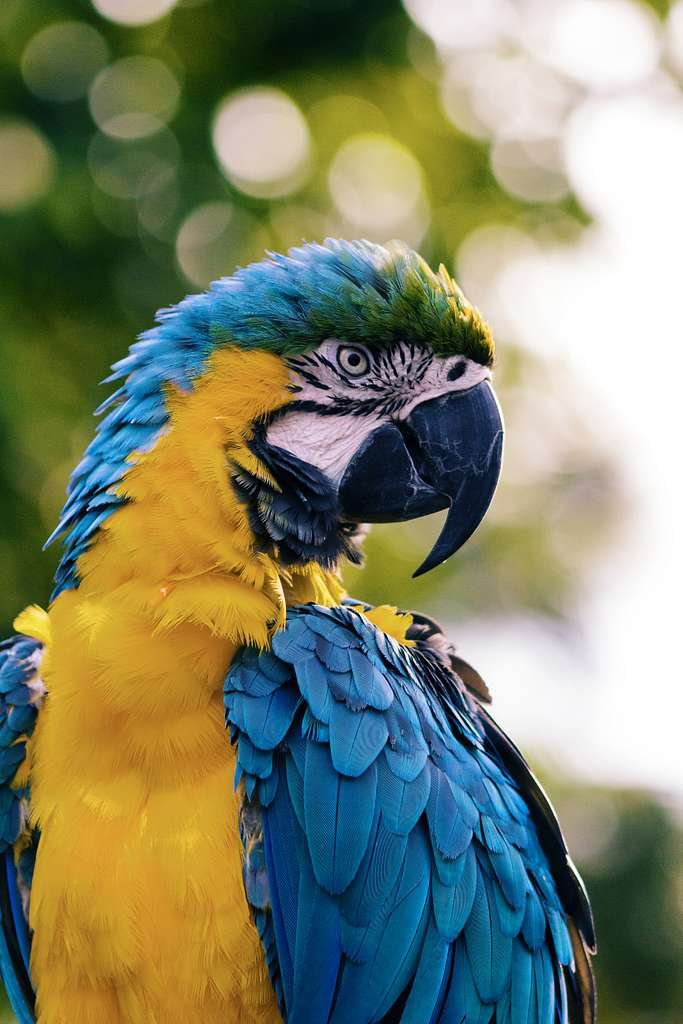

In [4]:
image = Image.open("Part_I_pic/parrot.jpg")
image_array = np.array(image)
image

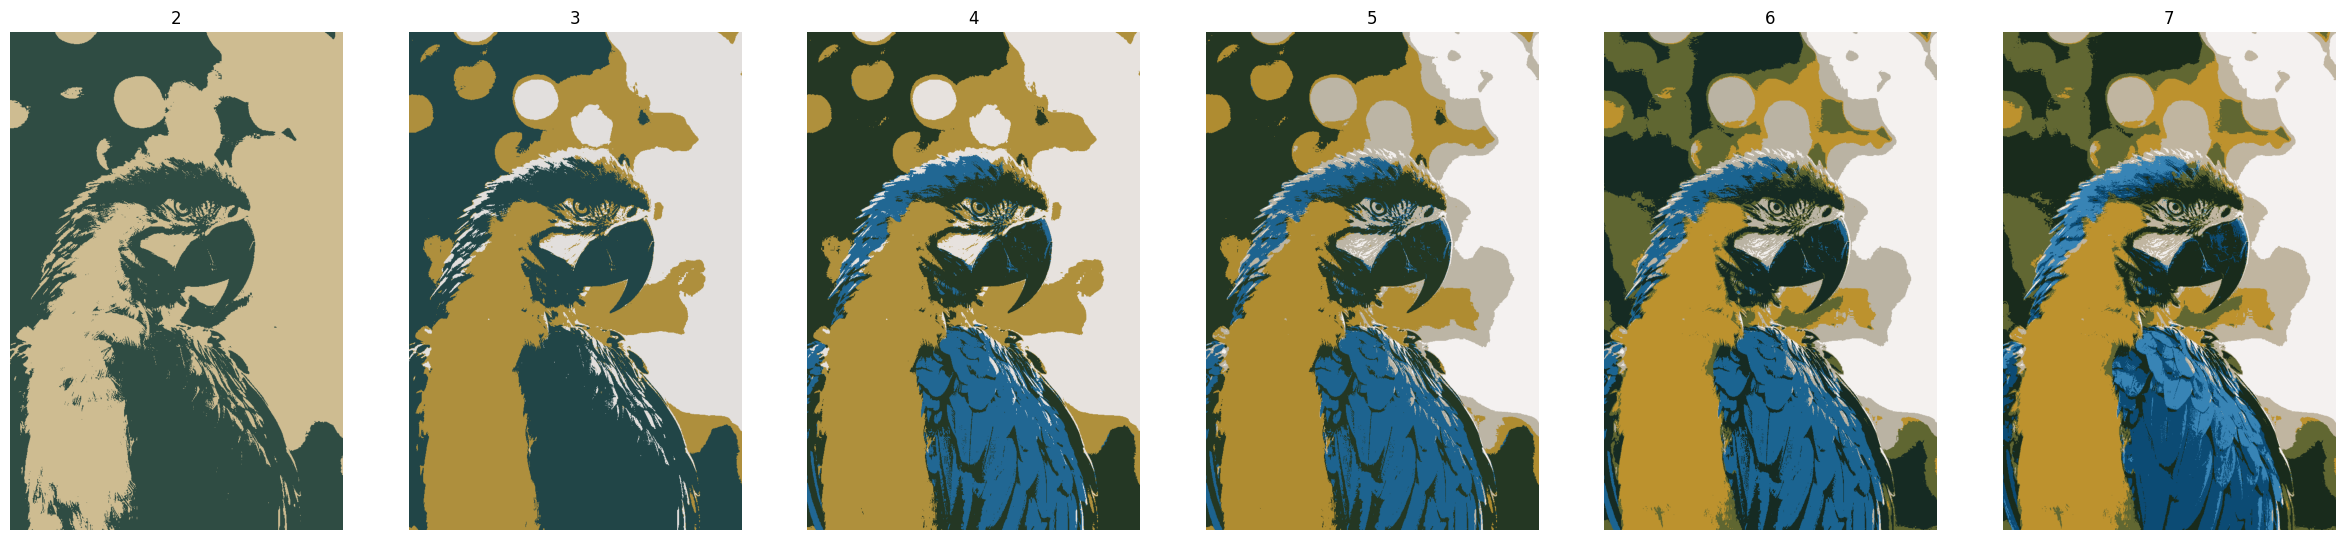

In [5]:
k_values = [2,3,4,5,6,7]
display_decolored_images(image_array, k_values)

## Part 2: Find an Optimal Clustering for a Dataset (40 points total)

## Tasks:
1. Explore the pre-written code for part 2.
2. Select a different dataset to cluster. Ex: find one on kaggle.
3. Run the code, adjusting it as needed for the new dataset.
4. Experiment with the code to find an optimal clustering. Ex: try different linkage.
5. Analyze the results.

*Write your analysis in this markdown cell.*

In [6]:
# Import all part 2 libraries here
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # Replace with another dataset
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load the dataset -> replace this with another dataset
data = load_iris()
X = data.data
y = data.target # note that the target won't be used


In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

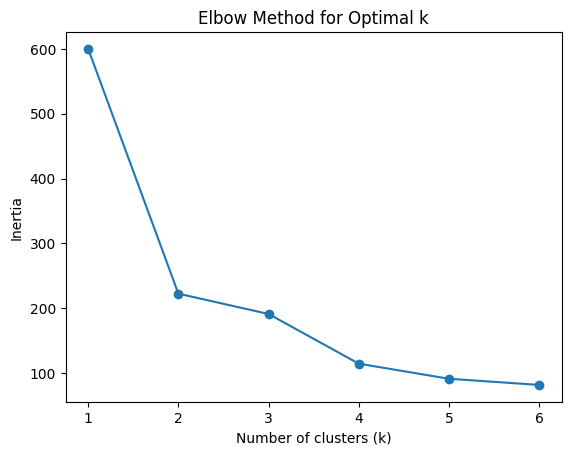

In [9]:

# K-Means Clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure()
plt.plot(range(1, 7), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



In [10]:
optimal_k = 2 # update this based on elbow method

# Fit K-Means with the optimal k found above (e.g., k=3)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)


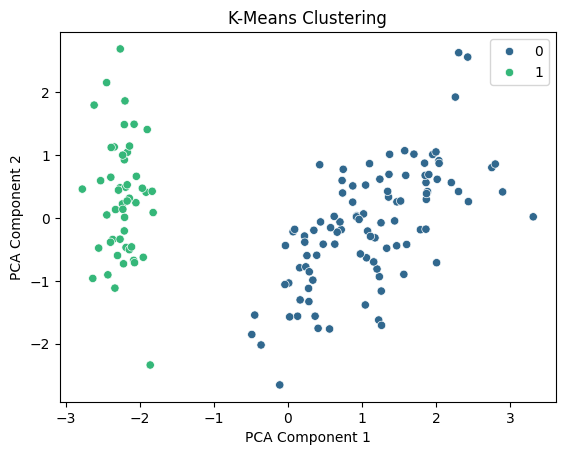

In [11]:
# Visualize clusters using PCA (for 2D visualization)
# Not needed if there are only 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()

In [12]:
# Part 2: Hierarchical Clustering
# Perform hierarchical clustering and plot the dendrogram
linked = linkage(X_scaled, method='ward')


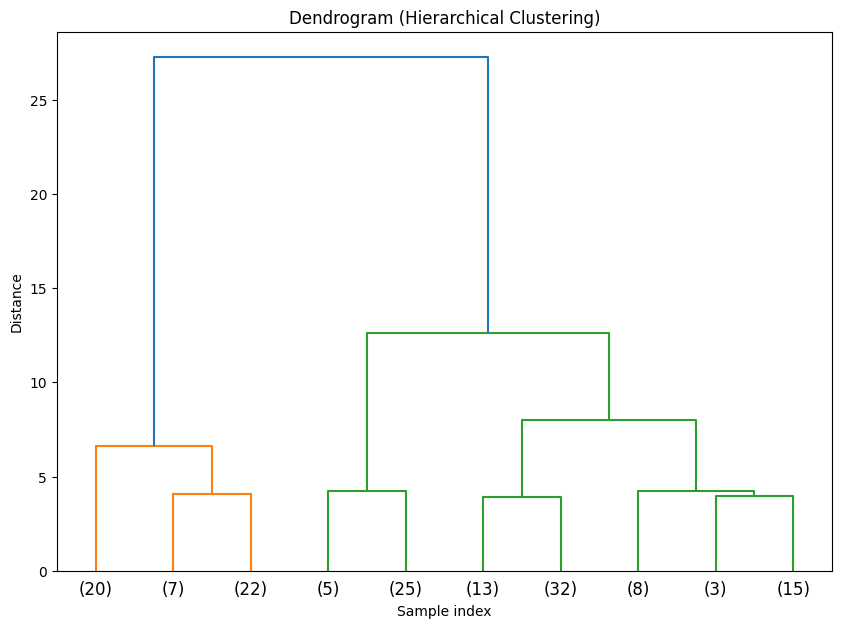

In [13]:
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [14]:
# Fit hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

In [15]:
# Part 3: Evaluation
# Compute Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette:.2f}')
print(f'Silhouette Score for Hierarchical Clustering: {agg_silhouette:.2f}')


Silhouette Score for K-Means: 0.58
Silhouette Score for Hierarchical Clustering: 0.58
